### Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Read data from CSV file

In [3]:
data = pd.read_csv('caschool.csv')

### Dataset Explaination
A data frame containing 420 observations on 14 variables.

***district:*** character. District code.  
***school:*** character. School name.  
***county:*** factor indicating county.  
***grades:*** factor indicating grade span of district.  
***students:*** Total enrollment.  
***teachers:*** Number of teachers.  
***calworks:*** Percent qualifying for CalWorks (income assistance).  
***lunch:*** Percent qualifying for reduced-price lunch.  
***computer:*** Number of computers.  
***expenditure:*** Expenditure per student.  
***income:*** District average income (in USD 1,000).  
***english:*** Percent of English learners.  
***read:*** Average reading score.  
***math:*** Average math score.  
***str:*** student teacher ratio.

In [4]:
data.head()

,observation_number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


### Clean data
We have a number of teachers that cannot be in decimal form, so we need to convert all values in the teacher variable into integers.

In [5]:
data = data.astype({'teachers':'int'})
data.head()

,observation_number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


# Test Score Column

### Descriptive Statistics

In [6]:
data['testscr'].describe()

count    420.000000
mean     654.156548
std       19.053348
min      605.550049
25%      640.049988
50%      654.449982
75%      666.662506
max      706.750000
Name: testscr, dtype: float64

So we have:
- Mean of test scores is `653.16`
- Median of test scores is `654.449982`
- Standard Deviation of test scores is `19.053348`
- The quartiles are `640.049988`, `654.449982`, `666.662506` respectively

In [7]:
idxMinTestScore = data['testscr'].idxmin()
idxMaxTestScore = data['testscr'].idxmax()
print(data['county'][idxMinTestScore])
print(data['county'][idxMaxTestScore])

Fresno
Santa Clara


So we have county with the lowest average test score, ***Fresno*** is `605.550049`  
And the highest average test score, ***Santa Clara*** is `706.750000`

In [8]:
data['testscr'].var()

363.0300564285934

We have variance of test scores is `363.0300564285934`

### Chart

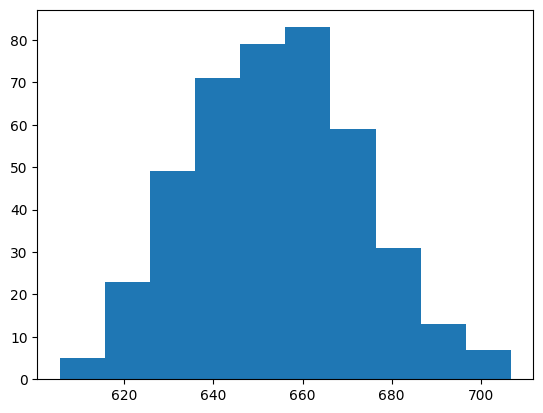

In [9]:
x = np.array(data['testscr'])
plt.hist(x)
plt.show()

***Comment:*** The shape of the data set from Caschool's test score column is most concentrated in the middle and the remaining values range symmetrically towards the extreme points -> Caschool's test score column is normally distributed

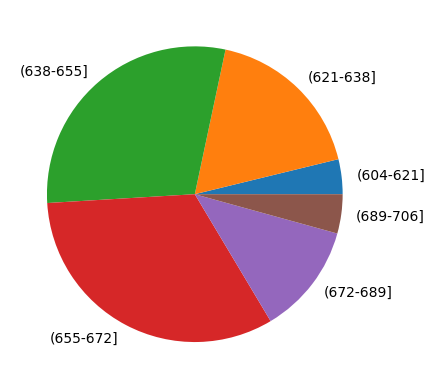

In [11]:
sortedTestscr = sorted(data['testscr'])
cutTestscr = pd.cut(sortedTestscr,[0,621,638,655,672,689,np.inf],labels=['(604-621]','(621-638]','(638-655]','(655-672]','(672-689]','(689-706]'])
count = []
labl = []
counter = Counter(cutTestscr)

for i in counter:
    count.append(counter[i])
    labl.append(i)
    
y = np.array(count)

plt.pie(y, labels=labl)
plt.show()

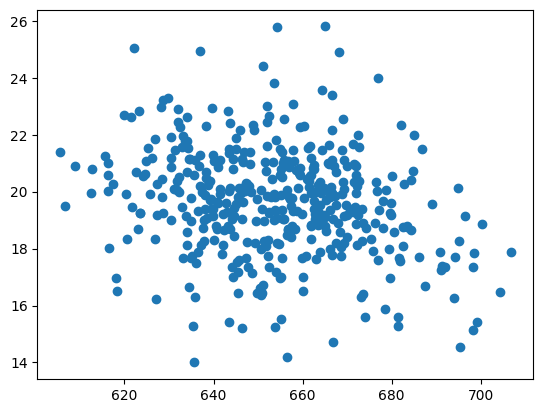

In [12]:
x = np.array(data.testscr)
y = np.array(data.str)

plt.scatter(x,y)
plt.show()

In [13]:
data.testscr.corr(data.str)

-0.2263627510868672

Then we have the correlation is `-0.2263627510868672` < 0, it means that the fewer students a teacher manages (student/teacher ratio), the higher the student's average score.  
But the correlation coefficient is only meaningful when less than -0.8 or greater than 0.8, so the correlation coefficient between these two variables is not meaningful.

# Enrollment Total Column

### Descriptive Statistics

In [14]:
data['enrl_tot'].describe()

count      420.000000
mean      2628.792857
std       3913.104985
min         81.000000
25%        379.000000
50%        950.500000
75%       3008.000000
max      27176.000000
Name: enrl_tot, dtype: float64

So we have:
- Mean of enrollment total is `2628.792857`
- Median of enrollment total is `950.500000`
- Standard Deviation of enrollment total is `3913.104985`
- The quartiles are `379.000000`, `950.500000`, `3008.000000` respectively

In [15]:
idxMinEnrollmentTotal = data['enrl_tot'].idxmin()
idxMaxEnrollmentTotal = data['enrl_tot'].idxmax()
print(data['county'][idxMinEnrollmentTotal])
print(data['county'][idxMaxEnrollmentTotal])

Sonoma
Kern


So we have the county with the lowest average enrollment total is ***Sonoma***, `81.000000`
And the highest average erollment total is ***Kern***, `27176.000000`

In [16]:
data['enrl_tot'].var()

15312390.622860553

We have variance of enrollment total is `15312390.622860553`

### Chart

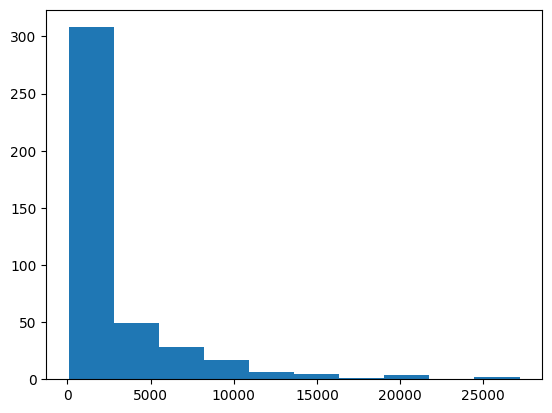

In [17]:
x = np.array(data['enrl_tot'])
plt.hist(x)
plt.show()

***Comment***: The shape of data set from Caschool's enrollment total column is highest at the beginning and the remaining values decrease towards the end -> Caschool's enrollment total column is non-normal distribution.

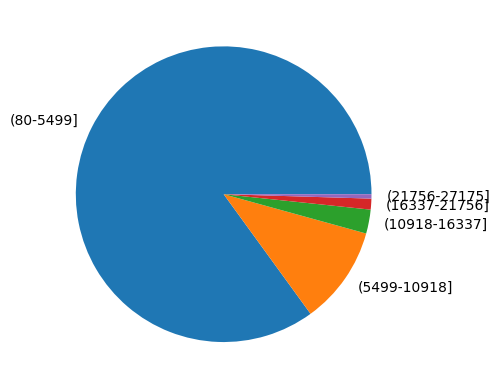

In [18]:
sortedEnrltot = sorted(data['enrl_tot'])
cutEnrltot = pd.cut(sortedEnrltot,[0,5499,10918,16337,21756,np.inf],labels=['(80-5499]','(5499-10918]','(10918-16337]','(16337-21756]','(21756-27175]'])
count = []
labl = []
counter = Counter(cutEnrltot)

for i in counter:
    count.append(counter[i])
    labl.append(i)
    
y = np.array(count)

plt.pie(y, labels=labl)
plt.show()

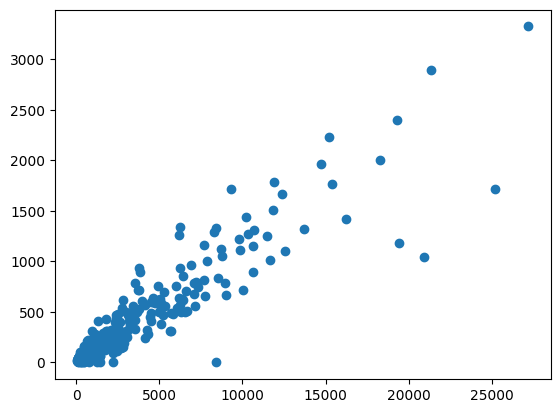

In [19]:
x = np.array(data.enrl_tot)
y = np.array(data.computer)

plt.scatter(x,y)
plt.show()

In [21]:
data.enrl_tot.corr(data.computer)

0.9288820929667774

We have correlation is  `0.9288820929667774` > 0, it means that the higher the total enrollment, the more computers the school has.
The correlation coefficient is meaningful when less than -0.8 or greater than 0.8, so the correlation between these two variables is meaningful.

# Math Score Column

### Descriptive Statistics

In [22]:
data['math_scr'].describe()

count    420.000000
mean     653.342619
std       18.754202
min      605.400024
25%      639.375015
50%      652.449982
75%      665.849991
max      709.500000
Name: math_scr, dtype: float64

So we have:
- Mean of math score is `653.342619`
- Median of math score is `652.449982`
- Standard Deviation of math score is `18.754202`
- The quartiles are `639.375015`, `652.449982`, `665.849991` respectively

In [23]:
idxMinMathScore = data['math_scr'].idxmin()
idxMaxMathScore = data['math_scr'].idxmax()
print(data['county'][idxMinMathScore])
print(data['county'][idxMaxMathScore])

Fresno
Santa Clara


So we have the county with the lowest average math score is ***Fresno***, `605.400024`
And the highest average math score is ***Sata Clara***, `709.500000`

In [24]:
data['math_scr'].var()

351.72009914605263

We have variance of math score is `351.72009914605263`

### Chart

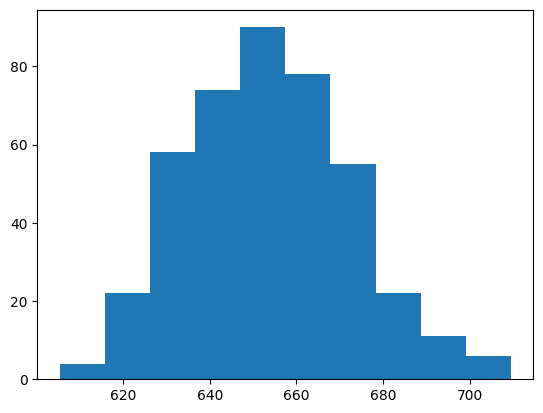

In [119]:
x = np.array(data['math_scr'])
plt.hist(x)
plt.show()

***Comment***: The shape of the data set is most concentrated in the middle and the remaining values range symmetrically towards the extreme points -> Caschool's math score column is normally distributed.

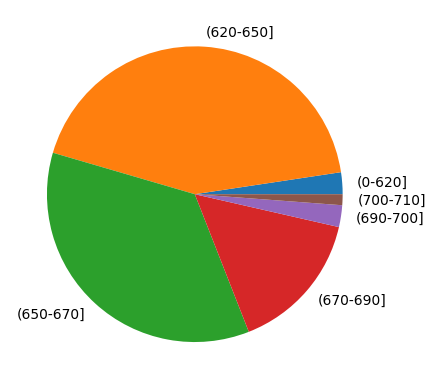

In [31]:
sortedMathscr = sorted(data['math_scr'])
cutTestscr = pd.cut(sortedMathscr,[0,620,650,670,690,700,np.inf],labels=['(0-620]','(620-650]','(650-670]','(670-690]','(690-700]','(700-710]'])
count = []
labl = []
counter = Counter(cutTestscr)

for i in counter:
    count.append(counter[i])
    labl.append(i)
    
y = np.array(count)

plt.pie(y, labels=labl)
plt.show()

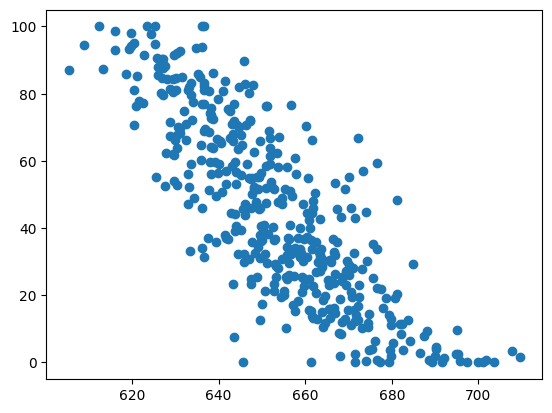

In [25]:
x = np.array(data.math_scr)
y = np.array(data.meal_pct)

plt.scatter(x,y)
plt.show()

In [26]:
data.math_scr.corr(data.meal_pct)

-0.8230145180649385

We have the correlation is `-0.8230145180649385` < 0, it means that the higher the student's average math score, the fewer students are eligible for a free lunch.
The correlation coefficient is meaningful when less than -0.8 or greater than 0.8, so the correlation coefficient between these two variables is meaningful.